# Wrangle & Analyze "WeRateDogs" Data


## Table of Contents
- [Introduction](#intro)
- [Gathering data](#gather)
- [Assessing data](#assess)
- [Cleaning data](#clean)
- [Storing, Analyzing, and Visualizing](#storing)

<a id='intro'></a>
## Introduction



The purpose of this project is to demonsrtize the skills we learned in data wrangling part of Udacity Data Analysis Nanodegree program.

The dataset that is wrangled is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. 

<a id='gather'></a>
## Gathering data

**1. Twitter archive file**

The file "twitter_archive_enhanced.csv" downloaded manually from Udacity resources    

In [84]:
#Import all packages needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import requests
from functools import reduce
from datetime import datetime
import tweepy 
import json 
import re
import seaborn as sns

# pandas settings
pd.set_option('display.max_colwidth', -1)

In [85]:
# load twitter archive
twitter_archive = pd.read_csv("twitter-archive-enhanced.csv")
# use tweet id column as index
twitter_archive.set_index("tweet_id", inplace = True)

In [86]:
# display few lines
twitter_archive.head()

,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
tweet_id,,,,,,,,,,,,,,,,
892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


In [87]:
# Explor a summary of the DataFrame
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 892420643555336193 to 666020888022790149
Data columns (total 16 columns):
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(2), object(10)
memory usa

**2. Tweet image prediction**

**The tweet image predictions**:
i.e., what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network. This file (image_predictions.tsv) is hosted on Udacity's servers and should be downloaded programmatically using the Requests library and the following URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv

In [88]:
#URL downloaded programatically 
# get file with the image predictions
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
with open('image-predictions.tsv' , 'wb') as file:
    predictions = requests.get(url)
    file.write(predictions.content)

# load image predictions
image_prediction = pd.read_csv('image-predictions.tsv', sep = '\t')
# use tweet id column as index
image_prediction.set_index("tweet_id", inplace = True)
# display few lines
image_prediction.head()

,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
tweet_id,,,,,,,,,,,
666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


**3. Twitter API File**

Twitter API file contains tweet id, favorite count and retweet count. Data was provided by Udacity, downloaded manually then will be loaded from the tweet-json.txt file into a pandas data frame

In [89]:
# load twitter API data
with open('tweet-json.txt') as f:
    twitter_api = pd.DataFrame((json.loads(line) for line in f), columns = ['id', 'favorite_count', 'retweet_count'])

# change column names
twitter_api.columns = ['tweet_id', 'favorites', 'retweets']
# use tweet id column as index
twitter_api.set_index('tweet_id', inplace = True)
# display few lines
twitter_api.head()

,favorites,retweets
tweet_id,,
892420643555336193,39467,8853
892177421306343426,33819,6514
891815181378084864,25461,4328
891689557279858688,42908,8964
891327558926688256,41048,9774


<a id='assess'></a>
## Assessing data

  Assess data visually as well as programmatically using pandas for quality and tidiness issues.

In [90]:
# display sample of data
twitter_archive.sample(5)

,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
tweet_id,,,,,,,,,,,,,,,,
793135492858580992,NaN,NaN,2016-10-31 17:00:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Your favorite squad is looking extra h*ckin spooky today. 13/10 for all https://t.co/PrgvOyPtDT,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/793135492858580992/photo/1,https://twitter.com/dog_rates/status/793135492858580992/photo/1",13,10,None,None,None,None,None
675153376133427200,NaN,NaN,2015-12-11 03:21:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",What kind of person sends in a picture without a dog in it? 1/10 just because that's a nice table https://t.co/RDXCfk8hK0,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675153376133427200/photo/1,1,10,None,None,None,None,None
671154572044468225,NaN,NaN,2015-11-30 02:31:34 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Holly. She's trying to teach small human-like pup about blocks but he's not paying attention smh. 11/10 &amp; 8/10 https://t.co/RcksaUrGNu,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671154572044468225/photo/1,11,10,Holly,None,None,None,None
667435689202614272,NaN,NaN,2015-11-19 20:14:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Ermergerd 12/10 https://t.co/PQni2sjPsm,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667435689202614272/photo/1,12,10,None,None,None,None,None
686606069955735556,NaN,NaN,2016-01-11 17:50:18 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Meet Horace. He was practicing his levitation, minding his own business when a rogue tennis ball spooked him. 10/10 https://t.co/tB9xYjMyZd",NaN,NaN,NaN,https://twitter.com/dog_rates/status/686606069955735556/photo/1,10,10,Horace,None,None,None,None


In [91]:
# print a summary of a DataFrame
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 892420643555336193 to 666020888022790149
Data columns (total 16 columns):
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(2), object(10)
memory usa

In [92]:
# check if ids are unique
twitter_archive.index.is_unique

True

In [93]:
# check number of replies
np.isfinite(twitter_archive.in_reply_to_status_id).sum()

78

In [94]:
# check number of retweets
np.isfinite(twitter_archive.retweeted_status_id).sum()

181

In [95]:
# check name of dog
twitter_archive.name.value_counts()

None         745
a            55 
Charlie      12 
Cooper       11 
Lucy         11 
Oliver       11 
Penny        10 
Tucker       10 
Lola         10 
Winston      9  
Bo           9  
Sadie        8  
the          8  
Daisy        7  
Toby         7  
an           7  
Buddy        7  
Bailey       7  
Oscar        6  
Stanley      6  
Milo         6  
Jax          6  
Rusty        6  
Jack         6  
Koda         6  
Dave         6  
Bella        6  
Scout        6  
Leo          6  
Larry        5  
            ..  
Wishes       1  
Jim          1  
Erik         1  
Lassie       1  
River        1  
Miguel       1  
Sailer       1  
Rooney       1  
Stewie       1  
Sparky       1  
Eazy         1  
Alejandro    1  
Cupid        1  
Reptar       1  
Shnuggles    1  
Gustaf       1  
Maxwell      1  
Shikha       1  
Lolo         1  
Bobby        1  
Ralph        1  
Dietrich     1  
Ginger       1  
Chaz         1  
Kara         1  
Acro         1  
Jo           1  
Autumn       1

In [96]:
# check if dogs have more than one category assigned
categories = ['doggo', 'floofer', 'pupper', 'puppo']

for category in categories:
    twitter_archive[category] = twitter_archive[category].apply(lambda x: 0 if x == 'None' else 1)

twitter_archive['number_categories'] = twitter_archive.loc[:,categories].sum(axis = 1)

In [97]:
# dogs categories
twitter_archive['number_categories'].value_counts()

0    1976
1    366 
2    14  
Name: number_categories, dtype: int64

In [98]:
# check rating denominator
twitter_archive.rating_denominator.value_counts()

10     2333
11     3   
50     3   
80     2   
20     2   
2      1   
16     1   
40     1   
70     1   
15     1   
90     1   
110    1   
120    1   
130    1   
150    1   
170    1   
7      1   
0      1   
Name: rating_denominator, dtype: int64

In [99]:
# check ratings with denominator greather than 10
twitter_archive[twitter_archive.rating_denominator > 10][['text', 'rating_denominator']]

,text,rating_denominator
tweet_id,,
832088576586297345,@docmisterio account started on 11/15/15,15
820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,70
775096608509886464,"RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…",11
758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,150
740373189193256964,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",11
731156023742988288,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,170
722974582966214656,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,20
716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50
713900603437621249,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,90


In [100]:
# check rating numerator
twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7       55 
14      54 
5       37 
6       32 
3       19 
4       17 
1       9  
2       9  
420     2  
0       2  
15      2  
75      2  
80      1  
20      1  
24      1  
26      1  
44      1  
50      1  
60      1  
165     1  
84      1  
88      1  
144     1  
182     1  
143     1  
666     1  
960     1  
1776    1  
17      1  
27      1  
45      1  
99      1  
121     1  
204     1  
Name: rating_numerator, dtype: int64

In [101]:
# check for any float ratings in the text column

with pd.option_context('max_colwidth', 200):
    display(twitter_archive[twitter_archive['text'].str.contains(r"(\d+\.\d*\/\d+)")]
            [['text', 'rating_numerator', 'rating_denominator']])

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  after removing the cwd from sys.path.


,text,rating_numerator,rating_denominator
tweet_id,,,
883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5,10
832215909146226688,"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",75,10
786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75,10
778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27,10
681340665377193984,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,5,10
680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26,10


In [102]:
# check expanded urls
twitter_archive[~twitter_archive.expanded_urls.str.startswith(('https://twitter.com','http://twitter.com', 'https://vine.co'), na=False)].sample(3)[['text','expanded_urls']]

,text,expanded_urls
tweet_id,,
690607260360429569,12/10 @LightningHoltt,NaN
813130366689148928,I've been informed by multiple sources that this is actually a dog elf who's tired from helping Santa all night. Pupgraded to 12/10,NaN
840632337062862849,Say hello to Maddie and Gunner. They are considerably pupset about bath time. Both 12/10 but Gunner needs your help\n\nhttps://t.co/JesYTzb1Jo https://t.co/5cncH08G1o,"https://www.gofundme.com/3hgsuu0,https://twitter.com/dog_rates/status/840632337062862849/photo/1"


In [103]:
# check for two or more urls in the expanded urls
twitter_archive[twitter_archive.expanded_urls.str.contains(',', na = False)].expanded_urls.count()

639

#### Quality & Tidiness Issues in twitter_archive
- Delete columns that won't be used for analysis.
- The timestamp has an incorrect datatype - is an object, should be DateTime.
- some of the gathered tweets are replies and should be removed.
- some of the gathered tweets are retweets.
- Dog 'stage' classification (doggo, floofer, pupper or puppo) should be one column.
- some dogs have more than one category assigned.
- Correct denominators other than 10.
- float ratings have been incorrectly read from the text of tweet.
- we have 639 expanded urls which contain more than one url address.

### Assess: Image Predictions

In [104]:
# display sample of data
image_prediction.sample(10)

,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
tweet_id,,,,,,,,,,,
887517139158093824,https://pbs.twimg.com/ext_tw_video_thumb/887517108413886465/pu/img/WanJKwssZj4VJvL9.jpg,1,limousine,0.130432,False,tow_truck,0.029175,False,shopping_cart,0.026321,False
830097400375152640,https://pbs.twimg.com/media/C4UZLZLWYAA0dcs.jpg,4,toy_poodle,0.442713,True,Pomeranian,0.142073,True,Pekinese,0.125745,True
704847917308362754,https://pbs.twimg.com/media/CcgfcANW4AA9hzr.jpg,1,golden_retriever,0.857240,True,Labrador_retriever,0.135460,True,Tibetan_mastiff,0.001903,True
786595970293370880,https://pbs.twimg.com/media/CuqM0fVWAAAboKR.jpg,1,Pembroke,0.709512,True,Cardigan,0.287178,True,chow,0.000570,True
675707330206547968,https://pbs.twimg.com/media/CWCYOqWUAAARmGr.jpg,1,bath_towel,0.721933,False,Staffordshire_bullterrier,0.059344,True,bagel,0.035702,False
724049859469295616,https://pbs.twimg.com/media/CgxXf1TWYAEjY61.jpg,1,Border_collie,0.581835,True,collie,0.344588,True,Shetland_sheepdog,0.043584,True
809084759137812480,https://pbs.twimg.com/media/CzpyM41UoAE1b2w.jpg,1,vizsla,0.911412,True,bloodhound,0.017134,True,Labrador_retriever,0.011761,True
696900204696625153,https://pbs.twimg.com/media/CavjCdJW0AIB5Oz.jpg,1,Chihuahua,0.297735,True,Pembroke,0.266953,True,basenji,0.136814,True
838476387338051585,https://pbs.twimg.com/media/C6Ld0wYWgAQQqMC.jpg,3,Great_Pyrenees,0.997692,True,kuvasz,0.001001,True,Newfoundland,0.000405,True


In [105]:
# print a summary of a DataFrame
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 666020888022790149 to 892420643555336193
Data columns (total 11 columns):
jpg_url    2075 non-null object
img_num    2075 non-null int64
p1         2075 non-null object
p1_conf    2075 non-null float64
p1_dog     2075 non-null bool
p2         2075 non-null object
p2_conf    2075 non-null float64
p2_dog     2075 non-null bool
p3         2075 non-null object
p3_conf    2075 non-null float64
p3_dog     2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(4)
memory usage: 152.0+ KB


In [106]:
# Check jpg_url for duplicates
sum(image_prediction.jpg_url.duplicated())

66

In [107]:
# check jpg_url to confirm if it contains only jpg and png images
image_prediction[~image_prediction.jpg_url.str.endswith(('.jpg', '.png'), na = False)].jpg_url.count()

0

In [108]:
image_prediction.img_num.value_counts()

1    1780
2    198 
3    66  
4    31  
Name: img_num, dtype: int64

In [109]:
# check 1st prediction
image_prediction.p1.sample(3)

tweet_id
667393430834667520    papillon         
693647888581312512    washbasin        
744709971296780288    Shetland_sheepdog
Name: p1, dtype: object

In [110]:
# check dog predictions
image_prediction.p1_dog.count()

2075

#### Quality & Tidiness Issues in Image Predictions


- the dataset has 2075 entries, while twitter archive dataset has 2356 entries.

- column names are confusing and do not give much information about the content.

- dog breeds contain underscores, and have different case formatting.

- only 2075 images have been classified as dog images for top prediction.

- 66 jpg_url duplicates were found.

- dataset should be merged with the twitter archive dataset.

### Assess: Twitter API Data

In [111]:
# display sample of data
twitter_api.sample(3)

,favorites,retweets
tweet_id,,
680440374763077632,1583,564
703774238772166656,2020,526
746757706116112384,10520,4432


In [112]:
# print a summary of a DataFrame
twitter_api.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2354 entries, 892420643555336193 to 666020888022790149
Data columns (total 2 columns):
favorites    2354 non-null int64
retweets     2354 non-null int64
dtypes: int64(2)
memory usage: 55.2 KB


In [113]:
# check if ids are unique
twitter_archive.index.is_unique

True

#### Quality & Tidiness Issues in Twitter API Data


- twitter archive dataset has 2356 entries, while twitter API data has 2354.

- dataset should be merged with the twitter archive dataset.

<a id='clean'></a>
## Cleaning Data

Using pandas, clean the quality and tidiness issues identified in the Assessing Data section.

### ▲ Clean: Twitter Archive Data

In [114]:
# create a copy of twitter archive dataset
twitter_archive_clean = twitter_archive.copy()

In [115]:
# display sample of data
twitter_archive_clean.sample(5)

,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,number_categories
tweet_id,,,,,,,,,,,,,,,,,
693109034023534592,NaN,NaN,2016-01-29 16:30:45 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","""Thank you friend that was a swell petting"" 11/10 (vid by @MatthewjamesMac) https://t.co/NY3cPAZAIM",NaN,NaN,NaN,https://twitter.com/dog_rates/status/693109034023534592/video/1,11,10,None,0,0,0,0,0
750429297815552001,NaN,NaN,2016-07-05 20:41:01 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Arnie. He's a Nova Scotian Fridge Floof. Rare af. 12/10 https://t.co/lprdOylVpS,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/750429297815552001/photo/1,https://twitter.com/dog_rates/status/750429297815552001/photo/1",12,10,Arnie,0,0,0,0,0
756303284449767430,NaN,NaN,2016-07-22 01:42:09 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Pwease accept dis rose on behalf of dog. 11/10 https://t.co/az5BVcIV5I,NaN,NaN,NaN,https://twitter.com/dog_rates/status/756303284449767430/photo/1,11,10,None,0,0,0,0,0
838831947270979586,NaN,NaN,2017-03-06 19:21:35 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Riley. His owner put a donut pillow around him and he loves it so much he won't let anyone take it off. 13/10 https:…,7.838400e+17,4.196984e+09,2016-10-06 01:23:05 +0000,"https://twitter.com/dog_rates/status/783839966405230592/photo/1,https://twitter.com/dog_rates/status/783839966405230592/photo/1,https://twitter.com/dog_rates/status/783839966405230592/photo/1",13,10,Riley,0,0,0,0,0
820078625395449857,NaN,NaN,2017-01-14 01:22:35 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",I've never wanted to go to a camp more in my entire life. 12/10 for all on board https://t.co/wJZlpGFEbD,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/820078625395449857/photo/1,https://twitter.com/dog_rates/status/820078625395449857/photo/1,https://twitter.com/dog_rates/status/820078625395449857/photo/1",12,10,None,0,0,0,0,0


**Define**

Some of the gathered tweets are replies and retweets

- remove retweets data from the dataset
- remove columns with retweet and replies information


**Code**

In [116]:
# display shape of dataframe
twitter_archive_clean.shape

(2356, 17)

In [117]:
# drop retweets                                                 
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['retweeted_status_id'].isnull()]

In [118]:
#TEST
print(sum(twitter_archive_clean.retweeted_status_user_id.value_counts()))

0


In [119]:
# display all columns
twitter_archive_clean.columns

Index(['in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp', 'source',
       'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'number_categories'],
      dtype='object')

In [120]:
# drop unnecessary columns
twitter_archive_clean.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id',
           'retweeted_status_user_id','retweeted_status_timestamp'], axis = 1, inplace = True)

In [121]:
# Test
# display shape of dataframe
twitter_archive_clean.shape

(2175, 12)

In [122]:
# Test
# display cleaned dataset
twitter_archive_clean.sample(3)

,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,number_categories
tweet_id,,,,,,,,,,,,
684538444857667585,2016-01-06 00:54:18 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","After watching this video, we've determined that Pippa will be upgraded to a 12/10. Please enjoy https://t.co/IKoRK4yoxV",https://twitter.com/dog_rates/status/684538444857667585/video/1,12,10,None,0,0,0,0,0
679722016581222400,2015-12-23 17:55:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Mike. He is a Jordanian Frito Pilates. Frowning because he can't see directly in front of him. 8/10 https://t.co/NL5QJwdEpF,https://twitter.com/dog_rates/status/679722016581222400/photo/1,8,10,Mike,0,0,0,0,0
884247878851493888,2017-07-10 03:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",OMG HE DIDN'T MEAN TO HE WAS JUST TRYING A LITTLE BARKOUR HE'S SUPER SORRY 13/10 WOULD FORGIVE IMMEDIATE https://t.co/uF3pQ8Wubj,https://twitter.com/kaijohnson_19/status/883965650754039809,13,10,None,0,0,0,0,0


**Define**

- Dog classification (doggo, floofer, pupper or puppo) should be one column. 
- Some dogs have more than one category assigned.


**Code**

In [123]:
# display sample of dataframe
twitter_archive_clean.head(3)

,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,number_categories
tweet_id,,,,,,,,,,,,
892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,0,0,0,0,0
892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,0,0,0,0,0
891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,0,0,0,0,0


In [124]:
# read dog types from text column
for index, column in twitter_archive_clean.iterrows():
    for word in ['puppo', 'pupper', 'doggo', 'floofer']:
        if word.lower() in str(twitter_archive_clean.loc[index, 'text']).lower():
            twitter_archive_clean.loc[index, 'dog_type'] = word.title()
            
# drop old columns
twitter_archive_clean.drop(['puppo',
                       'pupper',
                       'doggo',
                       'floofer'],
                      axis=1, inplace=True)

In [125]:
# Test
# display sample of fixed data
twitter_archive_clean.sample(3)

,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,number_categories,dog_type
tweet_id,,,,,,,,,
706310011488698368,2016-03-06 02:46:44 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a very sleepy pupper. Thinks it's an airplane. 12/10 would snug for eternity https://t.co/GGmcTIkBbf,"https://twitter.com/dog_rates/status/706310011488698368/photo/1,https://twitter.com/dog_rates/status/706310011488698368/photo/1",12,10,None,1,Pupper
727644517743104000,2016-05-03 23:42:26 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a doggo struggling to cope with the winds. 13/10 https://t.co/qv3aUwaouT,"https://twitter.com/dog_rates/status/727644517743104000/photo/1,https://twitter.com/dog_rates/status/727644517743104000/photo/1",13,10,None,1,Doggo
751598357617971201,2016-07-09 02:06:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Toby. A cat got his tongue. 13/10 adorable af https://t.co/fHQrBKYSLC,"https://twitter.com/dog_rates/status/751598357617971201/photo/1,https://twitter.com/dog_rates/status/751598357617971201/photo/1,https://twitter.com/dog_rates/status/751598357617971201/photo/1,https://twitter.com/dog_rates/status/751598357617971201/photo/1",13,10,Toby,0,NaN


**Define**

The timestamp has an incorrect datatype - is an object, should be DateTime

- convert to datetime.


**Code**

In [126]:
# convert to datetime
twitter_archive_clean.timestamp = pd.to_datetime(twitter_archive_clean.timestamp)

In [127]:
# Test
# display dataset types
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 892420643555336193 to 666020888022790149
Data columns (total 9 columns):
timestamp             2175 non-null datetime64[ns]
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
number_categories     2175 non-null int64
dog_type              385 non-null object
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 249.9+ KB


**Define**

Float ratings have been incorrectly read from the text of tweet

- gather correct rating when rating is a fraction.


**Code**

In [128]:
# Disply a sample before correction
twitter_archive_clean[twitter_archive_clean.text.str.contains(r'\d+\.\d+\/\d+')][['text','rating_denominator', 'rating_numerator']].sample(3)


,text,rating_denominator,rating_numerator
tweet_id,,,
681340665377193984,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,10,5
786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",10,75
680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,10,26


In [129]:
# convert both columns to floats
twitter_archive_clean['rating_numerator'] = twitter_archive_clean['rating_numerator'].astype(float)
twitter_archive_clean['rating_denominator'] = twitter_archive_clean['rating_denominator'].astype(float)

# find columns with fractions
fraction_ratings = twitter_archive_clean[twitter_archive_clean.text.str.contains(r'\d+\.\d+\/\d+', na = False)].index

# extract correct rating and replace incorrect one
for index in fraction_ratings:
    rating = re.search('\d+\.\d+\/\d+', twitter_archive_clean.loc[index,:].text).group(0)
    twitter_archive_clean.at[index,'rating_numerator'], twitter_archive_clean.at[index,'rating_denominator'] = rating.split('/')

In [130]:
# display sample of fixed data
twitter_archive_clean.loc[fraction_ratings,:][['text','rating_denominator', 'rating_numerator']].sample(3)

,text,rating_denominator,rating_numerator
tweet_id,,,
778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,10.0,11.27
680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,10.0,11.26
883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",10.0,13.50


**Define**

Denominator of some ratings is not 10. Numerator of some ratings is greater than 10. The fact that the rating numerators are greater than the denominators does not need to be cleaned, however I will introduce a normalized rating which will be easier to plot.

- fix incorrectly read ratings
- add normalized rating


**Code**

In [131]:
# save index of tweets with denominator greater than 10
high_denominator = twitter_archive[twitter_archive.rating_denominator > 10].index

# display sample of data with denominator greater than 10
twitter_archive_clean.loc[high_denominator,:][['text','rating_denominator', 'rating_numerator']].sample(3)

/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


,text,rating_denominator,rating_numerator
tweet_id,,,
697463031882764288,Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ,40.0,44.0
710658690886586372,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80.0,80.0
716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50.0,50.0


In [132]:
# fix rating manually for tweets for which rating was read incorrectly
twitter_archive_clean.loc[832088576586297345, 'rating_denominator'] = 0
twitter_archive_clean.loc[832088576586297345, 'rating_numerator'] = 0

twitter_archive_clean.loc[775096608509886464, 'rating_denominator'] = 10
twitter_archive_clean.loc[775096608509886464, 'rating_numerator'] = 14

twitter_archive_clean.loc[740373189193256964, 'rating_denominator'] = 10
twitter_archive_clean.loc[740373189193256964, 'rating_numerator'] = 14

twitter_archive_clean.loc[722974582966214656, 'rating_denominator'] = 10
twitter_archive_clean.loc[722974582966214656, 'rating_numerator'] = 13

twitter_archive_clean.loc[716439118184652801, 'rating_denominator'] = 10
twitter_archive_clean.loc[716439118184652801, 'rating_numerator'] = 11

twitter_archive_clean.loc[682962037429899265, 'rating_denominator'] = 10
twitter_archive_clean.loc[682962037429899265, 'rating_numerator'] = 10

In [133]:
# display sample of fixed rating
twitter_archive_clean.loc[high_denominator,:][['text','rating_denominator', 'rating_numerator']].sample(3)

,text,rating_denominator,rating_numerator
tweet_id,,,
758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,150.0,165.0
832088576586297345,@docmisterio account started on 11/15/15,0.0,0.0
686035780142297088,"Yes I do realize a rating of 4/20 would've been fitting. However, it would be unjust to give these cooperative pups that low of a rating",20.0,4.0


In [134]:
# add normalized rating
twitter_archive_clean['rating'] = twitter_archive_clean['rating_numerator'] / twitter_archive_clean['rating_denominator']

In [135]:
# Test
# display sample of data with the new column
twitter_archive_clean[['text','rating_denominator', 'rating_numerator', 'rating']].sample(5)

,text,rating_denominator,rating_numerator,rating
tweet_id,,,,
812503143955202048,I'm happy to inform you all that Jake is in excellent hands. 13/10 for him and his new family \nhttps://t.co/LRCTJpnCnS https://t.co/wZz7fI6XO1,10.0,13.0,1.3
822244816520155136,We only rate dogs. Please don't send pics of men capturing low level clouds. Thank you... 11/10 https://t.co/rLi83ZyCL5,10.0,11.0,1.1
675432746517426176,Happy Friday. Here's some golden puppers. 12/10 for all https://t.co/wNkqAED6lG,10.0,12.0,1.2
720340705894408192,This is Derek. He just got balled on. Can't even get up. Poor thing. 10/10 hang in there pupper https://t.co/BIRRF3bcWH,10.0,10.0,1.0
821522889702862852,This is Harlso. He has a really good idea but isn't sure you're going to like it. 13/10 he'll just keep it to himself https://t.co/IzcaR3Nqyn,10.0,13.0,1.3




**Define**

We have 639 expanded urls which contain more than one url address and 59 missing expanded urls

- build correct links by using tweet id


**Code**

In [136]:
# fix expanded urls
for index, column in twitter_archive_clean.iterrows():
    twitter_archive_clean.loc[index, 'expanded_urls'] = 'https://twitter.com/dog_rates/status/' + str(index)
    
# Test
twitter_archive_clean.sample(3)

,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,number_categories,dog_type,rating
tweet_id,,,,,,,,,,
683773439333797890,2016-01-03 22:14:26,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Buddy. He's gaining strength. Currently an F4 tornado with wind speeds up to 260mph. Very devastating. 9/10 https://t.co/qipZbshNsR,https://twitter.com/dog_rates/status/683773439333797890,9.0,10.0,Buddy,0.0,NaN,0.9
720043174954147842,2016-04-13 00:17:25,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Neptune. He's a Snowy Swiss Mountain Floofapolis. Cheeky wink. Tongue nifty af. 11/10 would pet so firmly https://t.co/SoZq2Xoopv,https://twitter.com/dog_rates/status/720043174954147842,11.0,10.0,Neptune,0.0,NaN,1.1
668528771708952576,2015-11-22 20:37:34,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Gòrdón. He enjoys his razberrita by pool. Not a care in the world. 12/10 this dog has a better life than me https://t.co/zpdBQCcYgW,https://twitter.com/dog_rates/status/668528771708952576,12.0,10.0,Gòrdón,0.0,NaN,1.2


### ▲ Clean: Image Predictions Data

In [137]:
# create a copy of dataset
image_prediction_clean = image_prediction.copy()

In [138]:
# display sample of data
image_prediction_clean.sample(3)

,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
tweet_id,,,,,,,,,,,
670783437142401025,https://pbs.twimg.com/media/CU8Z-OxXAAA-sd2.jpg,1,lacewing,0.381955,False,sulphur_butterfly,0.106810,False,leafhopper,0.068347,False
775729183532220416,https://pbs.twimg.com/media/CsPxk85XEAAeMQj.jpg,1,web_site,0.989407,False,hand-held_computer,0.002139,False,menu,0.002115,False
845677943972139009,https://pbs.twimg.com/media/C7xzmngWkAAAp9C.jpg,1,chow,0.808681,True,groenendael,0.123141,True,Newfoundland,0.022143,True


**Define**

- Columns names are confusing and do not give much information about the content.

- Change column names to more descriptive ones.


**Code**

In [139]:
# display current labels
image_prediction_clean.columns

Index(['jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [140]:
# change labels
image_prediction_clean.columns = ['image_url', 
                            'img_number', 
                            '1st_prediction',
                            '1st_prediction_confidence',
                            '1st_prediction_isdog',
                            '2nd_prediction',
                            '2nd_prediction_confidence',
                            '2nd_prediction_isdog',
                            '3rd_prediction',
                            '3rd_prediction_confidence',
                            '3rd_prediction_isdog']

In [141]:
# display new labels
image_prediction_clean.columns

Index(['image_url', 'img_number', '1st_prediction',
       '1st_prediction_confidence', '1st_prediction_isdog', '2nd_prediction',
       '2nd_prediction_confidence', '2nd_prediction_isdog', '3rd_prediction',
       '3rd_prediction_confidence', '3rd_prediction_isdog'],
      dtype='object')

**Define**

Dog breeds contain underscores, and have different case formatting

- Replace underscores with whitespace
- Capitalize the first letter of each word


**Code**

In [142]:
# columns with dog breed
dog_breed_cols = ['1st_prediction', '2nd_prediction', '3rd_prediction']

# remove underscore and capitalize the first letter of each word 
for column in dog_breed_cols:
    image_prediction_clean[column] = image_prediction_clean[column].str.replace('_', ' ').str.title()

In [143]:
# display sample of changes
image_prediction_clean[dog_breed_cols].sample(5)

,1st_prediction,2nd_prediction,3rd_prediction
tweet_id,,,
888554962724278272,Siberian Husky,Eskimo Dog,Malamute
816697700272001025,Chihuahua,Pomeranian,Maltese Dog
676957860086095872,Labrador Retriever,Beagle,Golden Retriever
673956914389192708,Pug,Brabancon Griffon,Chihuahua
847251039262605312,Airedale,Irish Terrier,Lakeland Terrier


**Define**

Drop 66 image_url duplicated


**Code**

In [144]:
#disply jpg_url duplicates 
sum(image_prediction_clean.image_url.duplicated())

66

In [145]:
#CODE: Delete duplicated jpg_url
image_prediction_clean = image_prediction_clean.drop_duplicates(subset=['image_url'], keep='last')

#TEST
sum(image_prediction_clean['image_url'].duplicated())

0

**Define**

Only 2075 images have been classified as dog images for top prediction

If 1st predictions is not a dog breed, then use dog breed predicted in the 2nd or 3rd predicion.


**Code**

In [146]:
# build function to determine dog breed
# if no breed detected, set value to NaN

def get_breed(row):
    if row['1st_prediction_isdog'] == True:
        return row['1st_prediction'], row['1st_prediction_confidence']
    if row['2nd_prediction_isdog'] == True:
        return row['2nd_prediction'], row['2nd_prediction_confidence']
    if row['3rd_prediction_isdog'] == True:
        return row['3rd_prediction'], row['3rd_prediction_confidence']
    return np.nan, np.nan

# apply function to dataset
# create new columns with data
image_prediction_clean[['breed_predicted', 'prediction_confidence']] = pd.DataFrame(image_prediction_clean.apply(lambda row: get_breed(row), axis = 1).tolist(), index = image_prediction_clean.index) 

# drop old columns
image_prediction_clean.drop(['1st_prediction',
                       '1st_prediction_confidence',
                       '1st_prediction_isdog',
                       '2nd_prediction',
                       '2nd_prediction_confidence',
                       '2nd_prediction_isdog',
                       '3rd_prediction',
                       '3rd_prediction_confidence',
                       '3rd_prediction_isdog'],
                      axis=1, inplace=True)

# drop rows without dog breed prediction
image_prediction_clean.dropna(subset = ['breed_predicted', 'prediction_confidence'], inplace = True)

In [147]:
# Test
# display sample of cleaned dataset
image_prediction_clean.sample(3)

,image_url,img_number,breed_predicted,prediction_confidence
tweet_id,,,,
666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh Springer Spaniel,0.465074
667878741721415682,https://pbs.twimg.com/media/CUTILFiWcAE8Rle.jpg,1,Miniature Pinscher,0.106003
798644042770751489,https://pbs.twimg.com/media/CU3mITUWIAAfyQS.jpg,1,English Springer,0.403698


The remaining task: dataset should be merged with the twitter archive dataset. will be covered in the Clean: Merge Datasets section.

### ▲ Clean: Twitter API Data

In [148]:
# display sample of data
twitter_api.sample(3)

,favorites,retweets
tweet_id,,
846514051647705089,48410,13076
841680585030541313,27854,8748
684940049151070208,3523,1191


The dataset looks clean so there is no need to perform cleaning tasks, 
except for merging it with the Twitter archive data, which is covered in the next section.

<a id='storing'></a>
## Storing, Analyzing, and Visualizing Data

### Storing

Merge all the three datasets and Store the clean DataFrame(s) in the CSV file ***twitter_archive_master.csv***

In [149]:
# join datasets
df = reduce(lambda left, right: pd.merge(left, right, on='tweet_id'), [twitter_archive_clean, image_prediction_clean, twitter_api])

In [150]:
# display new dataset
df.sample(3)

,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,number_categories,dog_type,rating,image_url,img_number,breed_predicted,prediction_confidence,favorites,retweets
tweet_id,,,,,,,,,,,,,,,,
735635087207878657,2016-05-26 00:54:06,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Dakota. He hasn't grow into his skin yet. 11/10 would squeeze softly https://t.co/IvFSlNXpgj,https://twitter.com/dog_rates/status/735635087207878657,11.0,10.0,Dakota,0.0,NaN,1.1,https://pbs.twimg.com/media/CjWANBlVAAAaN-a.jpg,1,Pug,0.891871,6776,2659
750086836815486976,2016-07-04 22:00:12,"<a href=""https://about.twitter.com/products/tweetdeck"" rel=""nofollow"">TweetDeck</a>",This is Spanky. He was a member of the 2002 USA Winter Olympic speed skating team. Accomplished af. 12/10 https://t.co/7tlZPrePXd,https://twitter.com/dog_rates/status/750086836815486976,12.0,10.0,Spanky,0.0,NaN,1.2,https://pbs.twimg.com/media/Cmf5WLGWYAAcmRw.jpg,1,Pug,0.978277,2383,613
760893934457552897,2016-08-03 17:43:45,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Wishes. He has the day off. Daily struggles of being a doggo have finally caught up with him. 11/10 https://t.co/H9YgrUkYwa,https://twitter.com/dog_rates/status/760893934457552897,11.0,10.0,Wishes,1.0,Doggo,1.1,https://pbs.twimg.com/media/Co88_ujWEAErCg7.jpg,1,Blenheim Spaniel,0.113992,4228,1104


In [151]:
#Store the clean DataFrame in a CSV file
df.to_csv('twitter_archive_master.csv')

### Analyzing and Visualizing Data

In [152]:
# display sample of data
df.sample(3)

,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,number_categories,dog_type,rating,image_url,img_number,breed_predicted,prediction_confidence,favorites,retweets
tweet_id,,,,,,,,,,,,,,,,
672594978741354496,2015-12-04 01:55:13,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Scott. Just trying to catch his train to work. Doesn't need everybody staring. 9/10 ignore the haters pupper https://t.co/jyXbZ35MYz,https://twitter.com/dog_rates/status/672594978741354496,9.0,10.0,Scott,1.0,Pupper,0.9,https://pbs.twimg.com/media/CVWJkJXWsAInlZl.jpg,1,Great Pyrenees,0.755945,1411,661
675109292475830276,2015-12-11 00:26:12,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",C'mon guys. We've been over this. We only rate dogs. This is a cow. Please only submit dogs. Thank you...... 9/10 https://t.co/WjcELNEqN2,https://twitter.com/dog_rates/status/675109292475830276,9.0,10.0,a,0.0,NaN,0.9,https://pbs.twimg.com/media/CV54UQTXAAAGf-j.jpg,1,Dalmatian,0.989519,3006,1259
743222593470234624,2016-06-15 23:24:09,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a very rare Great Alaskan Bush Pupper. Hard to stumble upon without spooking. 12/10 would pet passionately https://t.co/xOBKCdpzaa,https://twitter.com/dog_rates/status/743222593470234624,12.0,10.0,a,1.0,Pupper,1.2,https://pbs.twimg.com/media/ClB09z0WYAAA1jz.jpg,1,Kuvasz,0.350629,6792,2164


In [153]:
# display basic data summary
df.describe()

,rating_numerator,rating_denominator,number_categories,rating,img_number,prediction_confidence,favorites,retweets
count,1626.000000,1626.000000,1626.000000,1626.000000,1626.000000,1626.000000,1626.000000,1626.000000
mean,11.391009,10.522140,0.159287,1.081431,1.216482,0.550305,8603.169127,2555.534440
std,8.021945,7.000207,0.379266,0.187995,0.577420,0.300083,11700.108745,4301.337243
min,0.000000,2.000000,0.000000,0.000000,1.000000,0.000010,81.000000,16.000000
25%,10.000000,10.000000,0.000000,1.000000,1.000000,0.302321,2091.250000,622.250000
50%,11.000000,10.000000,0.000000,1.100000,1.000000,0.550604,4162.500000,1363.000000
75%,12.000000,10.000000,0.000000,1.200000,1.000000,0.822939,10857.250000,2992.500000
max,165.000000,150.000000,2.000000,3.428571,4.000000,0.999956,132810.000000,79515.000000


Looking at the basic statistics, we see that the rating 11/10 is the most common one. When it comes to the quality of dog breed predictions, the average confidence of ~50% suggests we might expect a lot of misclassified dogs. On the good side, the average value of favorites and retweets allow us to understand better how popular weRateDogs profile is. Average of 8603 favorites and 2555 retweets is impressive.

### Insight one
**Most common dog Breed**

An interesting information is the dog breed. This information comes from the image predictions file, which we merged with the tweeter archive at Storing section. Dog breeds were generated by running images through the neural network that can classify breeds of dogs.

In [154]:
# Display the number for each dog's breed 
df['breed_predicted'].value_counts()

Golden Retriever                  143
Labrador Retriever                103
Pembroke                          94 
Chihuahua                         87 
Pug                               60 
Toy Poodle                        50 
Chow                              45 
Pomeranian                        42 
Samoyed                           38 
Malamute                          32 
Chesapeake Bay Retriever          31 
French Bulldog                    30 
Cocker Spaniel                    26 
Miniature Pinscher                24 
Eskimo Dog                        22 
German Shepherd                   21 
Siberian Husky                    20 
Staffordshire Bullterrier         20 
Shih-Tzu                          20 
Rottweiler                        19 
Shetland Sheepdog                 19 
Maltese Dog                       19 
Beagle                            19 
Cardigan                          19 
Kuvasz                            18 
Italian Greyhound                 17 
Basset      

In [155]:
# horizontal bar plot function
def plot_barh(x, y, title="", xlabel="", ylabel="", rotation=0):
    
    plt.figure(figsize=(8,5)) 


    bar_list = plt.barh(x,y, color="#3F5D7D", edgecolor="k")


    plt.title(title,
              fontsize=17)
    
    plt.xlabel(xlabel,
               fontsize=15)
    
    plt.ylabel(ylabel,
               fontsize=15)

    return plt.show()

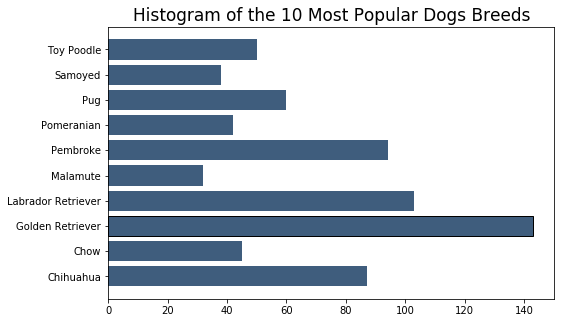

In [156]:
# plot 10 most popular dog breeds
dog_breeds = pd.DataFrame(df.breed_predicted.value_counts()[:10])

plot_barh(dog_breeds.index,
          dog_breeds.breed_predicted,
          title="Histogram of the 10 Most Popular Dogs Breeds")

**Golden Retriever, Labrador Retriever, Pembroke, and Chihuahua are the most popular dog breeds!**

### Insight 2
**Average rating among dog Breeds**

In [157]:
df_dog_type_mean = df.groupby('breed_predicted').mean()

In [158]:
df_dog_type_mean.head()

,rating_numerator,rating_denominator,number_categories,rating,img_number,prediction_confidence,favorites,retweets
breed_predicted,,,,,,,,
Afghan Hound,8.000000,10.0,0.000000,0.800000,1.000000,0.513621,12191.500000,3602.5000
Airedale,9.833333,10.0,0.083333,0.983333,1.166667,0.583771,5280.833333,1393.7500
American Staffordshire Terrier,10.312500,10.0,0.187500,1.031250,1.187500,0.527359,9380.187500,2310.8125
Appenzeller,11.000000,10.0,0.000000,1.100000,1.000000,0.503665,7317.500000,1458.0000
Australian Terrier,11.500000,10.0,0.000000,1.150000,2.000000,0.307584,11127.500000,3078.5000


In [159]:
df_dog_type_sorted = df_dog_type_mean['rating'].sort_values()

df_dog_type_sorted

breed_predicted
Japanese Spaniel               0.500000
Afghan Hound                   0.800000
Soft-Coated Wheaten Terrier    0.880000
Scotch Terrier                 0.900000
Walker Hound                   0.900000
Tibetan Terrier                0.925000
Dalmatian                      0.927273
Boston Bull                    0.941667
Welsh Springer Spaniel         0.950000
Saint Bernard                  0.950000
Maltese Dog                    0.952632
Dandie Dinmont                 0.957143
Norwich Terrier                0.960000
Miniature Schnauzer            0.960000
Redbone                        0.966667
English Setter                 0.971429
Scottish Deerhound             0.975000
Rhodesian Ridgeback            0.975000
Irish Terrier                  0.980000
Airedale                       0.983333
Papillon                       0.983333
Newfoundland                   0.985714
Mexican Hairless               0.985714
Miniature Poodle               0.987500
Miniature Pinscher      

### Insight 3
**Account Popularity over Time**

Account Popularity based on the numbers of Favorites and Retweets over time.

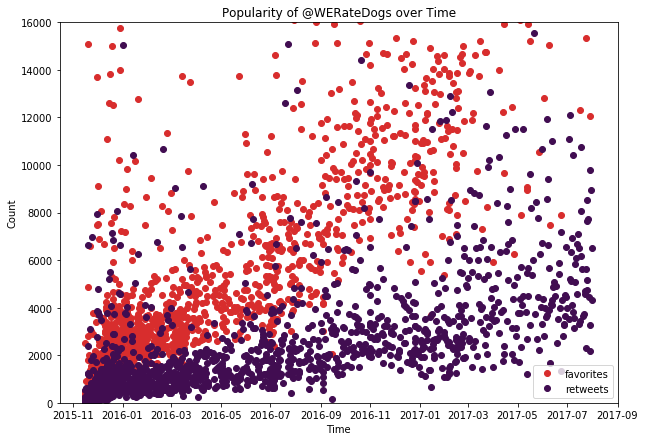

In [160]:
d = pd.DataFrame(df.timestamp)
fig, ax = plt.subplots(figsize=(10,7))
ax.plot_date(d,df.favorites, color="#d82d2d")
ax.plot_date(d,df.retweets, color="#410d51")
ax.set_ylim([0,16000])
ax.set_title('Popularity of @WERateDogs over Time')

# Setting x and y labels.
ax.set_ylabel('Count')
ax.set_xlabel('Time')
ax.legend()

**The page gained popularity over time as it is clear in the above graph.
We see an upward trend in the number of favorites and retweets. We can suppose that tweets were getting more and more favorites and retweets as WeRateDog account was becoming more and more popular.**

### Insight 5
**Dog Types**

WeRateDogs classifies dogs into one of four stages: doggo, pupper, puppo, and floof(er).Let's check how many dogs we have for each category.

In [161]:
df.dog_type.value_counts()

Pupper     184
Doggo      62 
Puppo      25 
Floofer    8  
Name: dog_type, dtype: int64

In [162]:
# bar plot function
def plot_bar(x, y, title="", xlabel="", ylabel="", rotation=0, width=0.8):
    
    plt.figure(figsize=(9,6)) 

    bar_list = plt.bar(x, y, color="#173c8c", edgecolor="k", width=width)


    plt.title(title,
              fontsize=18)
    
    plt.xlabel(xlabel,
               fontsize=15)
    
    plt.ylabel(ylabel,
               fontsize=15)

    return plt.show()

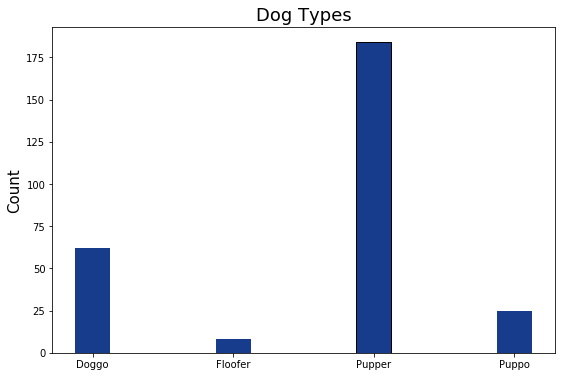

In [163]:
# plot dog types
dog_types = pd.DataFrame(df.dog_type.value_counts())

plot_bar(dog_types.index,
         dog_types.dog_type,
         width=0.25, 
         title="Dog Types", 
         ylabel="Count")

**Pupper is the most common dog category, followed by Doggo. Floofer is very rare.**

### Insight 4
WeRateDogs rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc.

In [164]:
# display basic stats
df.rating.describe()

count    1626.000000
mean     1.081431   
std      0.187995   
min      0.000000   
25%      1.000000   
50%      1.100000   
75%      1.200000   
max      3.428571   
Name: rating, dtype: float64

In [165]:
# line plot function
def plot_line(x, y, title="", xlabel="", ylabel="", marker=None, linestyle="-", xlim=None, ylim=None, xrotation=0):
    
    plt.figure(figsize=(10, 7))   

    ax = plt.subplot(111)    
    ax.spines["top"].set_visible(False)    
    ax.spines["right"].set_visible(False)    
    ax.grid(which='major', axis='both', linestyle='--', alpha=0.5, color="#9b2e2e")

    plt.yticks(fontsize=14)    
    plt.xticks(fontsize=14, rotation=xrotation)   

    if xlim is None:
        plt.xlim()
    else:
        plt.xlim(xlim)

    if ylim is None:
        plt.ylim()
    else:
        plt.ylim(ylim)
    
    plt.plot(x, y, marker=marker, linestyle=linestyle, color="#9b2e2e")

    plt.title(title,
              fontsize=18)
    
    plt.xlabel(xlabel,
               fontsize=14)
    
    plt.ylabel(ylabel,
               fontsize=14)

    return plt.show()

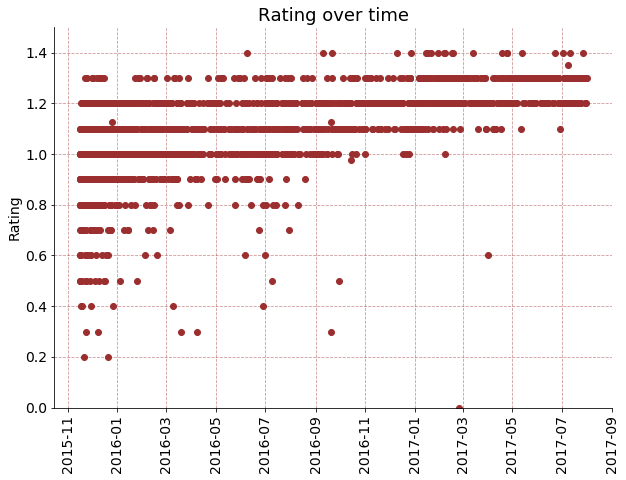

In [166]:
# plot rating over time
plot_line(df.timestamp, 
          df.rating,
          title="Rating over time", 
          ylabel="Rating", 
          marker='o', 
          linestyle='', 
          ylim=(0,1.5), 
          xrotation=90)

**At the beginning of the account activity, the lower ratings were more frequent.**                 

**With the elapse of time, less and less dogs received a low rating, and more and more high.**